In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import tikzplotlib
from scipy.stats import linregress
from scipy.optimize import curve_fit
import os
from numpy import arange

import numpy as np, scipy.stats as st

In [2]:
dir_study = ['Tesselation_64_Grain240_120', 'Tesselation_64_Grain240_40', 'Tesselation_64_Grain240_20', 'Tesselation_64_Grain60_10']
bez_study = ['1:240 - 2:120', '1:240 - 2:40', '1:240 - 2:20', '1:60 - 2:10']
dir_base_study = r'O:\scratch\MultiPhase\210913_Aufloesungsstudie'
dir_data = r'Data\geom\resolutiontestlists_multres.zip'

data_read_from = []
tex_save_to_multres = []
png_save_to_multres = []
for num, study in enumerate(dir_study):
    data_read_from.append(os.path.join(dir_base_study, study, dir_data))
    tex_save_to_multres.append(os.path.join(dir_base_study, study, r'Data\geom\multres_plot.tex'))
    png_save_to_multres.append(os.path.join(dir_base_study, study, r'Data\geom\multres_plot.png'))

#tex_save_to_multres = os.path.join(dir_base_study, dir_study,r'Data\geom\multres_plot.tex')
#png_save_to_multres = os.path.join(dir_base_study, dir_study, r'Data\geom\multres_plot.png')
gesamtbildtex = os.path.join(dir_base_study, 'multresplot1grL.tex')
gesamtbildpng = os.path.join(dir_base_study, 'multresplot1.png')

basdataframes = {}
df_confids = {}

 \begin{subfigure}[t]{0.5\textwidth}
            \centering
            \import{images/4_res/}{lt_leg.tex}
    \end{subfigure}

In [3]:

for num, study in enumerate(dir_study):
    basdataframes['platdf{}'.format(num)] = pd.read_csv(data_read_from[num])
    #platdf = pd.read_csv(data_read_from)

# = platdf[0:500:10]

In [4]:
###create confidence intervall Dataframe
for num, study in enumerate(dir_study):
    df_confids['df_confid{}'.format(num)] = pd.DataFrame(columns=['Ferritportion in %_mean',
                                  'Resolution32_mean', 'Resolution32_lbound','Resolution32_ubound',
                                  'Resolution64_mean','Resolution64_lbound','Resolution64_ubound',
                                  'Resolution128_mean','Resolution128_lbound','Resolution128_ubound',
                                  'Resolution256_mean','Resolution256_lbound','Resolution256_ubound'])

In [5]:
#df_confid

In [6]:
#bearbeite df für confidence intervall
for num, study in enumerate(dir_study):
    for index, row in  basdataframes['platdf{}'.format(num)].iterrows():
        #df_confid.append(pd.Series(), ignore_index=True, dtype='float64')
        newinf = []
        a = row.iat[0].strip('][').split(', ')
        a = np.array([float(m) for m in a])
        mean = np.mean(a)
        newinf.append(mean)
        for cols in range(1,5):
            a = row.iat[cols].strip('][').split(', ')
            a = np.array([float(m) for m in a])

            mean = np.mean(a)
            l_bound, u_bound = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
            #print(st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)))
            newinf.append(mean)
            newinf.append(l_bound)
            newinf.append(u_bound)

        a_series = pd.Series(newinf, index = df_confids['df_confid{}'.format(num)].columns)
        df_confids['df_confid{}'.format(num)] = df_confids['df_confid{}'.format(num)].append(a_series, ignore_index=True)
        
        

C:\Users\hro7rng\.conda\envs\graingen\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\hro7rng\.conda\envs\graingen\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


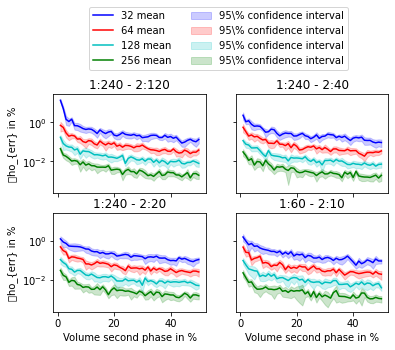

In [13]:
if len(dir_study) % 2 == 0:
    fig, ax= plt.subplots(int(len(dir_study)/2),int(len(dir_study)/2), sharex='all', sharey='all')
    
    count =  -1
    for ll in range(2):
        for rr in range(2):
            count += 1 
            ax[ll,rr].plot(df_confids['df_confid{}'.format(count)]['Ferritportion in %_mean'],df_confids['df_confid{}'.format(count)]['Resolution32_mean'], label='32 mean', color='b')
            ax[ll,rr].fill_between(df_confids['df_confid{}'.format(count)]['Ferritportion in %_mean'], df_confids['df_confid{}'.format(count)]['Resolution32_lbound'], df_confids['df_confid{}'.format(count)]['Resolution32_ubound'], color='b', alpha=.2, label='95\% confidence interval')
            ax[ll,rr].plot(df_confids['df_confid{}'.format(count)]['Ferritportion in %_mean'],df_confids['df_confid{}'.format(count)]['Resolution64_mean'], label='64 mean', color='r')
            ax[ll,rr].fill_between(df_confids['df_confid{}'.format(count)]['Ferritportion in %_mean'], df_confids['df_confid{}'.format(count)]['Resolution64_lbound'], df_confids['df_confid{}'.format(count)]['Resolution64_ubound'], color='r', alpha=.2, label='95\% confidence interval')
            ax[ll,rr].plot(df_confids['df_confid{}'.format(count)]['Ferritportion in %_mean'],df_confids['df_confid{}'.format(count)]['Resolution128_mean'], label='128 mean', color='c')
            ax[ll,rr].fill_between(df_confids['df_confid{}'.format(count)]['Ferritportion in %_mean'], df_confids['df_confid{}'.format(count)]['Resolution128_lbound'], df_confids['df_confid{}'.format(count)]['Resolution128_ubound'], color='c', alpha=.2, label='95\% confidence interval')
            ax[ll,rr].plot(df_confids['df_confid{}'.format(count)]['Ferritportion in %_mean'],df_confids['df_confid{}'.format(count)]['Resolution256_mean'], label='256 mean', color='g')
            ax[ll,rr].fill_between(df_confids['df_confid{}'.format(count)]['Ferritportion in %_mean'], df_confids['df_confid{}'.format(count)]['Resolution256_lbound'], df_confids['df_confid{}'.format(count)]['Resolution256_ubound'], color='g', alpha=.2, label='95\% confidence interval')
            ax[ll,rr].set_yscale('log')
            ax[ll,rr].set_title(bez_study[count])
            
    plt.setp(ax[-1, :], xlabel='Volume second phase in %')
    plt.setp(ax[:, 0], ylabel='\rho_{err} in %')
    plt.legend(loc='lower left', bbox_to_anchor=(-1.0, 2.4), ncol=2)
else:
    fig, ax= plt.subplots(1,1)
    count =  -1
    for ll in range(1):
        for rr in range(1):
            count += 1 
            ax.plot(df_confids['df_confid{}'.format(count)]['Ferritportion in %_mean'],df_confids['df_confid{}'.format(count)]['Resolution32_mean'], label='32 mean', color='b')
            ax.fill_between(df_confids['df_confid{}'.format(count)]['Ferritportion in %_mean'], df_confids['df_confid{}'.format(count)]['Resolution32_lbound'], df_confids['df_confid{}'.format(count)]['Resolution32_ubound'], color='b', alpha=.2, label='32 confidence interval 95%')
            ax.plot(df_confids['df_confid{}'.format(count)]['Ferritportion in %_mean'],df_confids['df_confid{}'.format(count)]['Resolution64_mean'], label='64 mean', color='r')
            ax.fill_between(df_confids['df_confid{}'.format(count)]['Ferritportion in %_mean'], df_confids['df_confid{}'.format(count)]['Resolution64_lbound'], df_confids['df_confid{}'.format(count)]['Resolution64_ubound'], color='r', alpha=.2, label='64 confidence interval 95%')
            ax.plot(df_confids['df_confid{}'.format(count)]['Ferritportion in %_mean'],df_confids['df_confid{}'.format(count)]['Resolution128_mean'], label='128 mean', color='c')
            ax.fill_between(df_confids['df_confid{}'.format(count)]['Ferritportion in %_mean'], df_confids['df_confid{}'.format(count)]['Resolution128_lbound'], df_confids['df_confid{}'.format(count)]['Resolution128_ubound'], color='c', alpha=.2, label='128 confidence interval 95%')
            ax.plot(df_confids['df_confid{}'.format(count)]['Ferritportion in %_mean'],df_confids['df_confid{}'.format(count)]['Resolution256_mean'], label='256 mean', color='g')
            ax.fill_between(df_confids['df_confid{}'.format(count)]['Ferritportion in %_mean'], df_confids['df_confid{}'.format(count)]['Resolution256_lbound'], df_confids['df_confid{}'.format(count)]['Resolution256_ubound'], color='g', alpha=.2, label='256 confidence interval 95%')
            ax.set_yscale('log')
            ax.set_title(bez_study[count])
    plt.xlabel("Volumefraction second phase in %")
    plt.ylabel("$\rho_{err}$ in %")  
    
    plt.legend(bbox_to_anchor=(1.0, 0.85))

    






tikzplotlib.save(gesamtbildtex)
#fig.savefig(gesamtbildpng, bbox_inches='tight', dpi=150, transparent=True)
plt.show()

In [70]:
# define the true objective function 5.Poly
def objective(x, a, b, c, d, e, f):
	return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

In [72]:
data = platdf.values
x, y = data[:, 0], data[:, 1]

In [73]:

# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b, c, d, e, f = popt
#print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

y = -217.23018 * x + 2255.97815 * x^2 + -10017.88958


In [75]:
platdf['Res32_Trend'] = objective(platdf['Ferritportion in %'],a,b,c,d,e,f)
platdf

,Ferritportion in %,Resolution32,Resolution64,Resolution128,Resolution256,Res32_Trend
0,0.500,0.115967,0.012970,0.008392,0.000238,-0.832588
1,0.499,0.127012,0.003932,0.001257,0.000552,-0.766520
2,0.498,0.119717,0.005141,0.004912,0.001130,-0.702572
3,0.497,0.100112,0.032673,0.004361,0.000164,-0.640704
4,0.496,0.092734,0.027244,0.000828,0.002125,-0.580879
...,...,...,...,...,...,...
495,0.005,1.123047,1.089478,0.293350,0.000095,5.781764
496,0.004,0.817871,0.517273,0.150299,0.041926,5.979295
497,0.003,2.742513,1.343791,0.023142,0.011222,6.181100
498,0.002,23.706055,0.135803,0.088120,0.025535,6.387239


Text(0, 0.5, 'error in %')

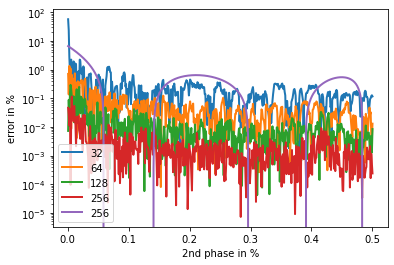

In [76]:
plt.plot('Ferritportion in %', 'Resolution32', data=platdf, marker='', linewidth=2, label=32)
plt.plot('Ferritportion in %', 'Resolution64', data=platdf, marker='', linewidth=2, label=64)
plt.plot('Ferritportion in %', 'Resolution128', data=platdf, marker='', linewidth=2, label=128)
plt.plot('Ferritportion in %', 'Resolution256', data=platdf, marker='', linewidth=2, label=256)

plt.plot('Ferritportion in %', 'Res32_Trend', data=platdf, marker='', linewidth=2, label=256)


plt.yscale('log')
plt.legend()
plt.xlabel("2nd phase in %")
plt.ylabel("error in %")